# Project : Sentiment Analysis on IMDB Movie Reviews

In this project, we will build a sentiment analysis model to predict the sentiment of movie reviews (positive or negative) using the IMDB dataset. We will employ Natural Language Processing (NLP) techniques to clean and process the reviews and train a machine learning model (Logistic Regression) to classify the sentiment.

## Importing Necessary Libraries

In [2]:
# import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import  spacy

## Loading the Data and Displaying the First Few Rows

In [3]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.dtypes

review       object
sentiment    object
dtype: object

In [7]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

## Visualization of the initial data

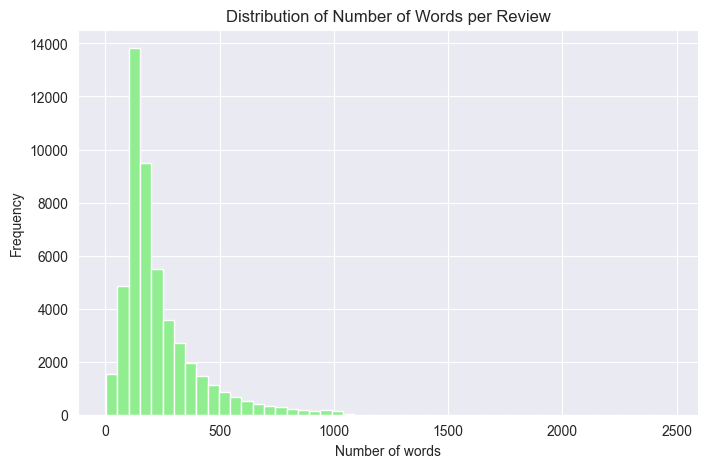

In [8]:
# Number of words in the review
def nb_of_word(text):
    words=text.split()
    word_count=len(words)
    return word_count

df['nb_of_words'] = df['review'].apply(nb_of_word)
# View word count per review
plt.figure(figsize=(8, 5))
plt.hist(df['nb_of_words'], bins=50, color='lightgreen')
plt.title('Distribution of Number of Words per Review')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Visualize the distribution of feelings
plt.figure(figsize=(6, 4))
df['sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Répartition des Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Fréquence')
plt.xticks(rotation=0)
plt.show()

## Data Cleaning

We use the SpaCy library to clean the reviews. This includes removing punctuation, stop words, digits, and unnecessary words. The reviews are then lemmatized to ensure we work with the base forms of words.

In [12]:
nlp = spacy.load('en_core_web_sm')

cleaned_reviews = []
sentiments = []


# Process each review
for i, review in enumerate(df['review']):
    review = review.replace("<br />", "")
    doc = nlp(review)
    tokens = [
        tok.lemma_ for tok in doc
        if not tok.is_punct                # No punctuation
        and not tok.is_digit               # No digits
        and not tok.is_stop                # No stop words
        and tok.pos_ != "PRON"             # No pronouns
        and tok.ent_type_ == ""            # No named entities
        and tok.pos_ != "PROPN"            # No proper nouns
        and len(tok.text) > 2              # No short words
    ]

    # Concatenate tokens into a single cleaned review string
    cleaned_review = " ".join(tokens)

    # Append cleaned review and sentiment to respective lists
    cleaned_reviews.append(cleaned_review)
    sentiments.append(df['sentiment'][i])

dfClean = pd.DataFrame({'review': cleaned_reviews, 'sentiment': sentiments})

# Display the resulting DataFrame
print(dfClean.head())


Tokens nettoyés : ['reviewer', 'mention', 'watch', 'episode', 'hook', 'right', 'exactly', 'happen', 'thing', 'strike', 'brutality', 'unflinche', 'scene', 'violence', 'set', 'right', 'word', 'trust', 'faint', 'hearted', 'timid', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'call', 'nickname', 'give', 'focus', 'mainly', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privacy', 'high', 'agenda', 'home', 'gangsta', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'far', 'away', 'main', 'appeal', 'fact', 'go', 'show', 'dare', 'forget', 'pretty', 'picture', 'paint', 'mainstream', 'audience', 'forget', 'charm', 'forget', 'romance', 'mess', 'episode', 'see', 'strike', 'nasty', 'surreal', 'ready', 'watch', 'develop', 'taste', 'get', 'accustom', 'high', 'level', 'graphic', 'violence', 'violence', 'injustice', 'crooked', 'guard', 'sell', 'nickel', 'inmate', 'kill', 'order', 'away', 'mannered', '

In [1]:
# Save the DataFrame to a CSV file
dfClean.to_csv('dfClean2.csv', index=False)

NameError: name 'dfClean' is not defined

In [9]:
# Import the new dataset
dfClean = pd.read_csv('dfClean2.csv')
# Create graph for the most frequent words
dfClean.head()


,review,sentiment
0,reviewer mention watch episode hook right exac...,positive
1,wonderful little production filming technique ...,positive
2,think wonderful way spend time hot sit air con...,positive
3,basically family little boy think zombie close...,negative
4,money visually stunning film watch offer vivid...,positive


## Visualizing Most Frequent Words After Cleaning

Now, we will create word clouds for positive and negative reviews to visually explore the most frequent words in each category.

Most common words in positive reviews: [('film', 49707), ('movie', 44007), ('good', 21931), ('like', 19931), ('time', 15900), ('character', 13907), ('great', 13850), ('story', 13752), ('see', 12946), ('watch', 12718), ('love', 11142), ('think', 11091), ('scene', 9976), ('play', 9759), ('know', 9356), ('life', 9032), ('way', 8714), ('find', 8594), ('people', 8344), ('come', 8263)]
Most common words in negative reviews: [('movie', 57312), ('film', 44056), ('like', 24022), ('bad', 21209), ('good', 17720), ('watch', 14804), ('time', 14730), ('character', 14215), ('think', 11969), ('see', 11692), ('look', 11491), ('scene', 11276), ('story', 10769), ('go', 9727), ('know', 9613), ('thing', 9311), ('people', 9053), ('get', 8751), ('plot', 8489), ('way', 8176)]


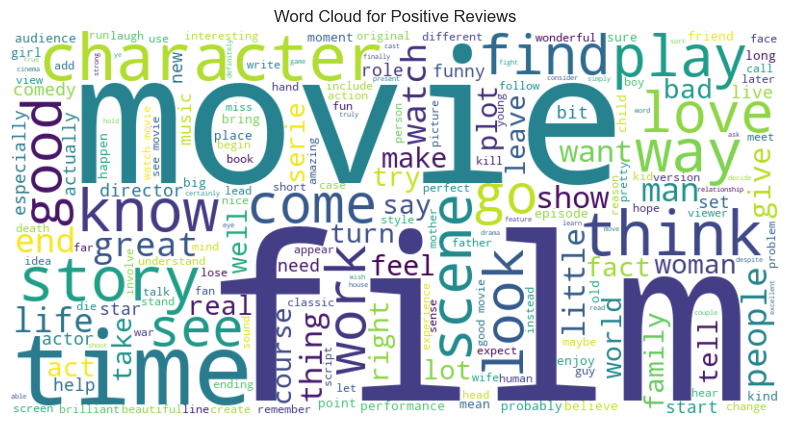

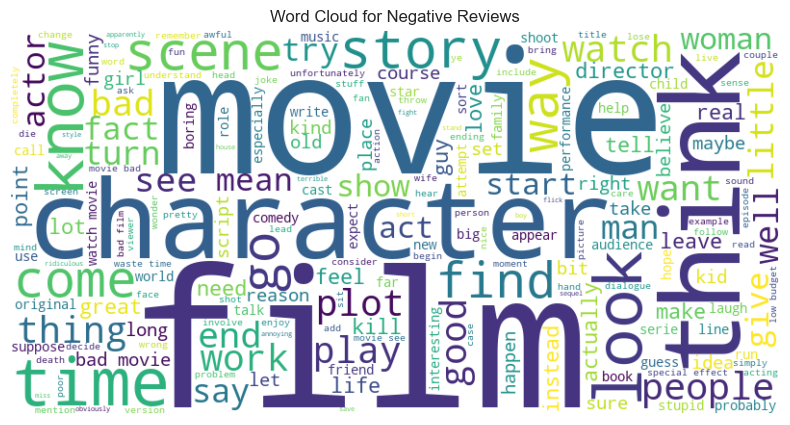

In [74]:
from wordcloud import WordCloud
from collections import Counter

# Tokenize all reviews
positive_words = ' '.join(dfClean[dfClean['sentiment'] == 'positive']['review']).split()
negative_words = ' '.join(dfClean[dfClean['sentiment'] == 'negative']['review']).split()

# Count word frequencies
positive_freq = Counter(positive_words).most_common(20)
negative_freq = Counter(negative_words).most_common(20)

print("Most common words in positive reviews:", positive_freq)
print("Most common words in negative reviews:", negative_freq)


# Create word clouds
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))
negative_wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words))

# Display word clouds
plt.figure(figsize=(10, 5))
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


## Training a Logistic Regression Model

In this section, we split the data into training and test sets, apply TF-IDF vectorization to convert the text data into numerical format, and train a Logistic Regression model for sentiment classification.

In [10]:
# Create a model to predict the sentiment of a review
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [11]:
# Split the data into training and testing sets
X = dfClean['review']
y = dfClean['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer =  TfidfVectorizer(
    max_df=0.95,
    min_df=2,
    max_features=50000
)

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [12]:
# Train a logistic regression model
model = LogisticRegression(C=
1.3311216080736887, random_state=42
                           ,solver="lbfgs")

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

## Model Performance Evaluation

### Accuracy and Classification report

In [13]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8854
              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



The model achieved an accuracy of 0.8819, meaning that it correctly predicted the sentiment (positive or negative) for approximately 88.19% of the 10,000 samples.

- Precision measures the accuracy of positive predictions. For the negative class, the precision is 0.89, meaning 89% of the negative predictions were correct. For the positive class, the precision is 0.88, indicating that 88% of the positive predictions were correct.

- Recall measures how well the model identifies the positive and negative classes. For the negative class, the recall is 0.87, meaning the model correctly identified 87% of the actual negative instances. For the positive class, the recall is 0.89, indicating the model successfully identified 89% of the actual positive instances.

- The F1-score is the harmonic mean of precision and recall, balancing both metrics. The F1-scores are 0.88 for both the negative and positive classes, indicating a well-balanced performance in terms of precision and recall.

- The macro average and weighted average of precision, recall, and F1-score are both 0.88, which shows that the model performs similarly across both classes, with no significant bias toward one class over the other

### ROC Curve and AUC

AUC: 0.9540342034409374


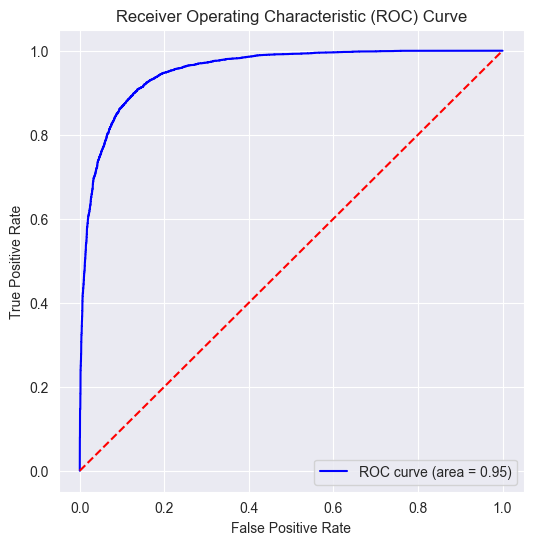

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label="positive")

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="blue", label="ROC curve (area = %0.2f)" % auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

The ROC curve (Receiver Operating Characteristic) helps evaluate the performance of a binary classification model by showing the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) at different classification thresholds.

Here’s how to interpret the ROC curve and AUC (Area Under the Curve) for your model:

Area Under the Curve (AUC):

- AUC = 0.95: This means the model is very good. An AUC of 1 indicates a perfect model, while an AUC of 0.5 means the model is no better than random guessing. A value of 0.95 shows that the model is excellent at distinguishing between positive and negative classes.

- ROC Curve:

- The x-axis represents the False Positive Rate (FPR), which is the proportion of negative instances incorrectly classified as positive.
- The y-axis represents the True Positive Rate (TPR), which is the proportion of positive instances correctly classified as positive.
- The dashed red line represents random classification, where the model has no ability to distinguish between classes.
- The blue curve shows your model's performance. The closer the curve is to the top-left corner (high TPR and low FPR), the better the model is. This means the model correctly classifies most positive examples while minimizing false positives.

Model Interpretation:

- If your ROC curve shows that the model quickly achieves a high true positive rate with a low false positive rate (as in your case), it indicates the model is good at predicting positive classes and limiting false positives.
- A curve near the top-left corner and a high AUC (close to 1) mean the model is effective in its predictions.

### Cross-Validation

In [14]:
# Cross validation
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross validation
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


Cross-validation scores: [0.884125 0.885125 0.880125 0.88225  0.882625]
Average cross-validation score: 0.88285


The scores across different folds (0.8816, 0.881, 0.8811, 0.8782, 0.8802) are very close to each other. This indicates that the model is not overfitting or underfitting, and it performs reliably across different subsets of the data.

An accuracy of 88% means that the model is correctly classifying a high proportion of instances. This is generally considered a good performance, especially for tasks with a balanced dataset like yours.

The fact that the scores don’t vary much between folds suggests that the model generalizes well and should perform similarly on new, unseen data.

In [11]:
# Training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Test accuracy (already calculated as 0.8822 in your case)
test_accuracy = model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.921375
Test Accuracy: 0.8854


### Confusion Matrix

We plot the confusion matrix to see how well the model classifies the positive and negative reviews.

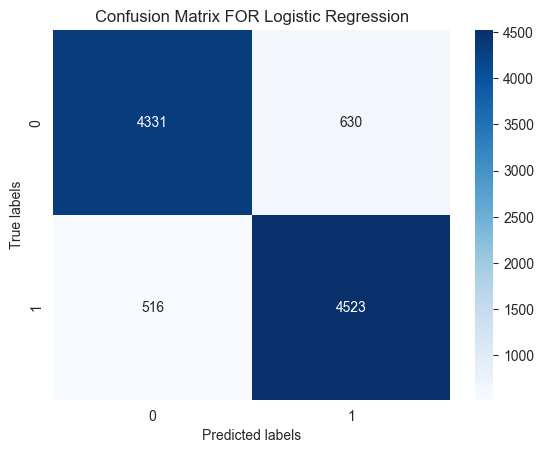

In [12]:
# Confusion matrix for the logistic regression model

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix FOR Logistic Regression')
plt.show()


The training accuracy of 90.64% indicates that the model performs very well on the data it was trained on. This suggests that the model has learned the patterns in the training data effectively.

However, the test accuracy of 88.19% is slightly lower, which is expected as the test data consists of unseen examples. This difference between training and test accuracy is common and suggests that the model generalizes well to new data without overfitting to the training set.

In general, an 88.19% test accuracy is still a good result, showing that the model performs well on unseen data.

In [20]:
# Testing score for F1_score
from sklearn.metrics import f1_score

# Assuming y_test and y_pred are already defined
f1 = f1_score(y_test, y_pred , pos_label='positive')
print("F1 Score:", f1)


F1 Score: 0.8875588697017268


## Saving the model

In [13]:
#Save the model
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

## Testing the Model with Sample Reviews

We now test the model with different types of reviews (positive, negative, and neutral).

### Positive Review

In [14]:
# Test the model with a review
review = """
If you watch the trailer and you think its just gonna be a fun stop-motion animated Lego movie, you were wrong. The Lego Movie is beyond fun. its creative and it brings back a lot childhood memories. The story was amazing, the jokes were hilarious, and they have great intention in details.

But, the most important thing, the movie remind us to be creative. Because sometimes, As we grow up, in someway, we stop being creative and just follow the rules and instruction. For adults, this movie will bring back your childhood memories and how you used to play randomly with those Lego. And for a kids, you'll just love this movie, and definitely makes you want to play with your own Lego.

totally worth watching movie! even your grandparents will enjoy this movie! 9/10
"""

review = vectorizer.transform([review])
sentiment = model.predict(review)

proba=model.predict_proba(review)

print(f"Sentiment: {sentiment[0]}")

print(f"Probability of negative sentiment: {proba[0][0]:.4f}")
print(f"Probability of positive sentiment: {proba[0][1]:.4f}")


Sentiment: positive
Probability of negative sentiment: 0.1360
Probability of positive sentiment: 0.8640


### Negative Review

In [15]:
# Test the model with a review
review = """
This movie is honestly terrible, I don't know how it got good reviews. Me and my sister got bored of this movie after 30 minutes when we saw it in theaters so we left. But I decided to give it a second chance today, and I thought it was terrible. The movie is very cliché. The villain didn't feel threatening at all, and it was a cliché villain. The jokes were repetitive.I had absolutely no feelings for the characters. I found them all annoying and trying to be funny but failed. And the ending was horrible.I would recommend not seeing this movie unless you have a kid that would want to see it. since this movie is for kids and only kids will laugh at it. Most grown adults will find it boring. All my friends found it boring.

If you want to see a good animated adult like movie, watch how to train your dragon
"""
review = vectorizer.transform([review])
sentiment = model.predict(review)

proba=model.predict_proba(review)

print(f"Sentiment: {sentiment[0]}")

print(f"Probability of negative sentiment: {proba[0][0]:.4f}")
print(f"Probability of positive sentiment: {proba[0][1]:.4f}")


Sentiment: negative
Probability of negative sentiment: 0.7492
Probability of positive sentiment: 0.2508


### Neutral Review

In [16]:
reviewNeutre= """
The film has an interesting premise and some strong performances, particularly from [actor's name]. The storyline keeps you engaged, though it can feel predictable at times. While the visuals are impressive, the pacing may be slow for some viewers. Overall, it's an enjoyable experience, but it might not stand out in the long run.
"""

reviewNeutre = vectorizer.transform([reviewNeutre])
sentiment = model.predict(reviewNeutre)

proba=model.predict_proba(reviewNeutre)

print(f"Sentiment: {sentiment[0]}")

print(f"Probability of negative sentiment: {proba[0][0]:.4f}")
print(f"Probability of positive sentiment: {proba[0][1]:.4f}")

Sentiment: positive
Probability of negative sentiment: 0.3196
Probability of positive sentiment: 0.6804


## SHAP (SHapley Additive exPlanations)


We use SHAP to explain the model's predictions and interpret which features (words) contribute the most to the sentiment prediction.

C:\Users\ckerv\Downloads\ML\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


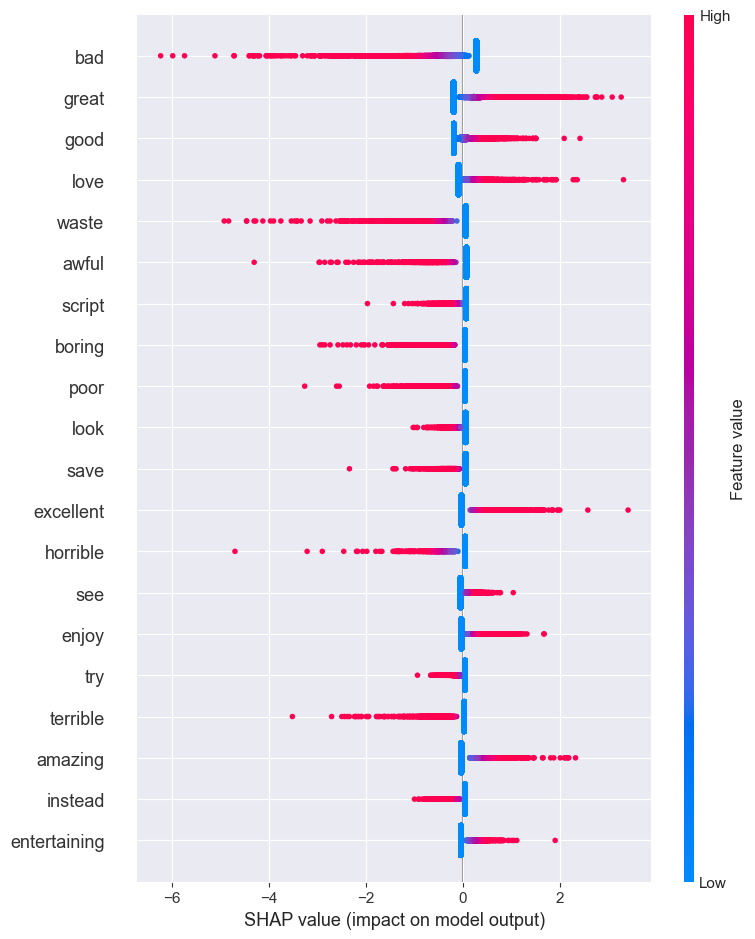

In [17]:
import shap
import numpy as np
import scipy

# Convert sparse matrices to dense
X_train_dense = X_train.toarray() if scipy.sparse.issparse(X_train) else X_train
X_test_dense = X_test.toarray() if scipy.sparse.issparse(X_test) else X_test

# Use SHAP's new masker API
masker = shap.maskers.Independent(X_train_dense)

# Initialize SHAP explainer
explainer = shap.LinearExplainer(model, masker)
shap_values = explainer.shap_values(X_test_dense)

# Interactive plot for a specific review
review_index = 0
review_dense = X_test_dense[review_index]

shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[review_index],
    review_dense,
    feature_names=vectorizer.get_feature_names_out()
)

# Summary plot
shap.summary_plot(shap_values, X_test_dense, feature_names=vectorizer.get_feature_names_out())

# Top contributing features for a specific prediction
feature_names = vectorizer.get_feature_names_out()
shap_values_dense = shap_values[review_index]
features_with_contribution = list(zip(feature_names, shap_values_dense))
sorted_features = sorted(features_with_contribution, key=lambda x: -abs(x[1]))


Review: wonderful little production filming technique unassuming- old time fashion give comforting discomforte sense realism entire piece actor extremely chosen- get polari voice truly seamless editing guide reference diary entry worth watching terrificly write perform piece masterful production great master comedy life realism come home little thing fantasy guard use traditional dream technique remain solid disappear play knowledge sense particularly scene concern set particularly flat mural decorate surface terribly
Sentiment: positive


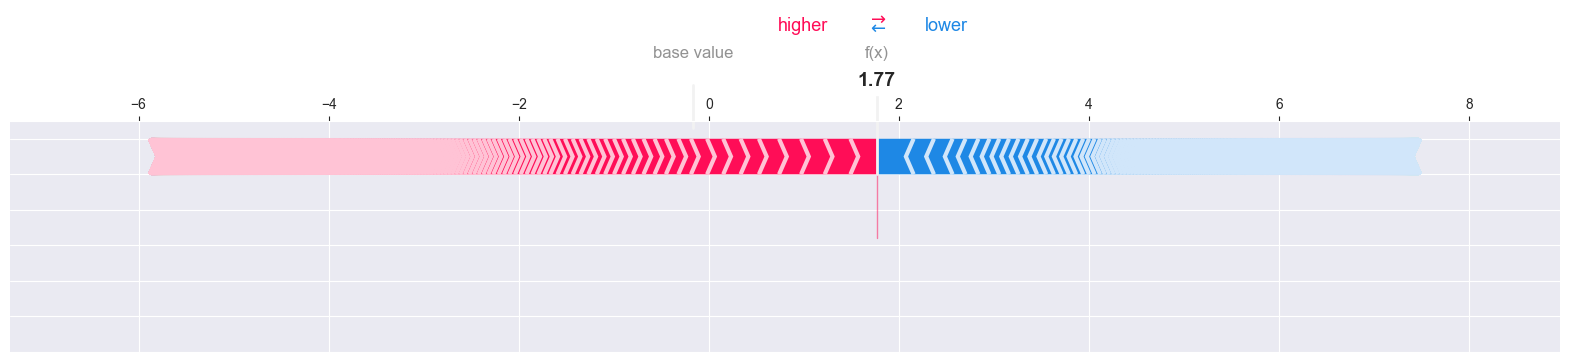

In [14]:
# Ensure dense representation
X_test_dense = X_test.toarray() if scipy.sparse.issparse(X_test) else X_test

# Use SHAP's new masker API
masker = shap.maskers.Independent(X_train_dense)

# Initialize SHAP explainer
explainer = shap.LinearExplainer(model, masker)
shap_values = explainer.shap_values(X_test_dense)

# Plot for the first review
review_index = 1
review_dense = X_test_dense[review_index]
print("Review:", dfClean['review'][review_index])
print("Sentiment:", y_test.iloc[review_index])

shap.initjs()
# Generate the force plot for the first review
shap.force_plot(
    explainer.expected_value,
    shap_values[review_index],
    review_dense,
    feature_names=vectorizer.get_feature_names_out(),
    matplotlib=True  # Force Matplotlib rendering
)


The SHAP summary plot visualizes the impact of features (in this case, words) on the output of your logistic regression model. Here's how to interpret it:

Key Elements of the Plot
Y-Axis (Feature Names):

These are the words (features) in your model that contribute the most to the predictions. For example, "bad," "great," "good," etc.
X-Axis (SHAP Values):

The SHAP value represents how much each word shifts the model’s prediction for a review, either positively or negatively.
Negative SHAP values (left side) decrease the probability of the "positive" sentiment.
Positive SHAP values (right side) increase the probability of the "positive" sentiment.
Colors (Feature Values):

The color represents the frequency or importance of the feature in a specific prediction:
Red/Pink: Higher feature values or higher word frequency.
Blue: Lower feature values or lower word frequency.
Distribution (Scatter and Boxplots):

Each dot represents a SHAP value for a particular word in a single review.
The spread shows how the word affects different reviews differently.
Example Interpretation
"bad":

Mostly has negative SHAP values (on the left), indicating that when the word "bad" is present in a review, it strongly pushes the prediction toward the "negative" sentiment.
Red points near the left mean "bad" frequently occurs and strongly contributes to negative predictions.
"great":

Mostly has positive SHAP values (on the right), meaning its presence pushes the sentiment toward "positive."
Red points near the right indicate "great" is commonly found in reviews labeled as "positive."
"boring":

Primarily pushes the sentiment toward "negative" when present (on the left).
"excellent":

Pushes predictions toward "positive" (on the right) and is impactful when present.
Actionable Insights
Words like "bad," "boring," and "awful" are strong indicators of negative sentiment.
Words like "great," "excellent," and "amazing" strongly indicate positive sentiment.
Neutral or low-impact words may cluster around 0 (no significant effect on predictions).

          Word  Contribution
0         good      4.847538
1         good      4.847538
2     annoying     -4.301359
3    recommend      2.763150
4        bored     -2.554896
..         ...           ...
151        All      0.000000
152    boring.      0.000000
153         If      0.000000
154          a      0.000000
155     movie,      0.000000

[156 rows x 2 columns]


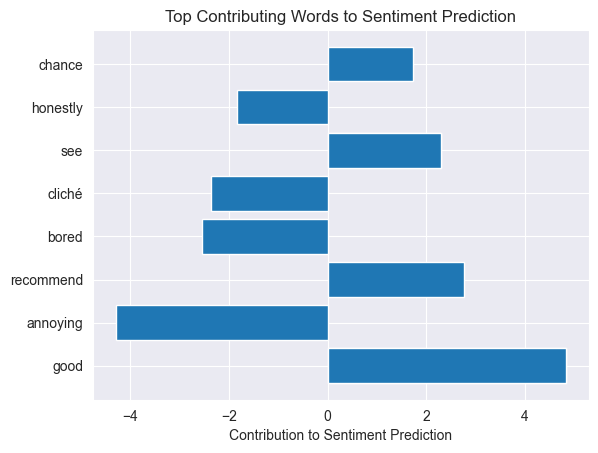

Predicted Sentiment: negative
[[0.7492015 0.2507985]]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you already have a trained model and vectorizer
# For example:
# model = LogisticRegression()
# vectorizer = TfidfVectorizer(stop_words='english')

# Example review for prediction
review_to_predict = """This movie is honestly terrible, I don't know how it got good reviews. Me and my sister got bored of this movie after 30 minutes when we saw it in theaters so we left. But I decided to give it a second chance today, and I thought it was terrible. The movie is very cliché. The villain didn't feel threatening at all, and it was a cliché villain. The jokes were repetitive.I had absolutely no feelings for the characters. I found them all annoying and trying to be funny but failed. And the ending was horrible.I would recommend not seeing this movie unless you have a kid that would want to see it. since this movie is for kids and only kids will laugh at it. Most grown adults will find it boring. All my friends found it boring.

If you want to see a good animated adult like movie, watch how to train your dragon"""

# Step 1: Transform the review using the same vectorizer
review_transformed = vectorizer.transform([review_to_predict])

# Step 2: Predict the sentiment (probabilities for binary classification)
probabilities = model.predict_proba(review_transformed)

# Step 3: Get the coefficients of the model and the corresponding words
coefficients = model.coef_.flatten()
words = vectorizer.get_feature_names_out()

# Step 4: Map the coefficients to the words
word_contributions = {words[i]: coefficients[i] for i in range(len(words))}

# Get the words in the review and their corresponding contributions
review_words = review_to_predict.split()
word_importance = [(word, word_contributions.get(word, 0)) for word in review_words]

# Sort the words by their absolute contribution
word_importance = sorted(word_importance, key=lambda x: abs(x[1]), reverse=True)

# Step 5: Visualize the word contributions
word_importance_df = pd.DataFrame(word_importance, columns=['Word', 'Contribution'])
print(word_importance_df)

# Plot the top contributing words
top_words = word_importance_df.head(10)
plt.barh(top_words['Word'], top_words['Contribution'])
plt.xlabel('Contribution to Sentiment Prediction')
plt.title('Top Contributing Words to Sentiment Prediction')
plt.show()

# Optionally, print the predicted sentiment
predicted_sentiment = model.predict(review_transformed)
print("Predicted Sentiment:", predicted_sentiment[0])

proba=model.predict_proba(review_transformed)
print(proba)


            word  importance  abs_importance
3530         bad  -10.520671       10.520671
49179      waste   -9.935476        9.935476
3374       awful   -8.416231        8.416231
15356  excellent    7.636691        7.636691
19374      great    7.619622        7.619622
5356      boring   -6.877557        6.877557
33337       poor   -6.242026        6.242026
44123   terrible   -6.191348        6.191348
15941       fail   -5.889467        5.889467
1769     amazing    5.799679        5.799679


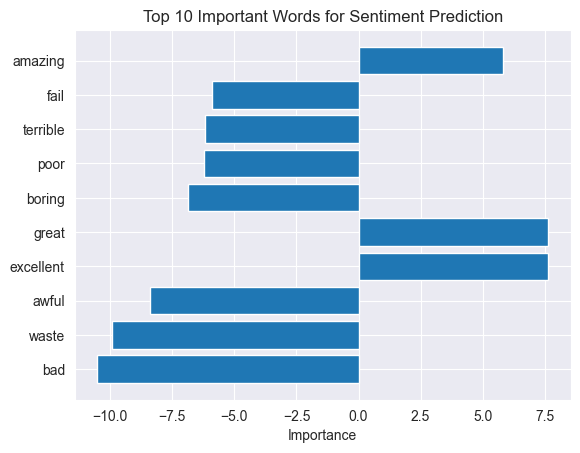

In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Assuming you have a dataset (dfClean) with 'review' and 'sentiment' columns
# Vectorize the text using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(dfClean['review'])
y = dfClean['sentiment']

# Train a logistic regression model
model = LogisticRegression( max_iter=100,C=1)
model.fit(X, y)

# Get feature importance (coefficients of the trained model)
coefficients = model.coef_.flatten()

# Get the words corresponding to the features
words = vectorizer.get_feature_names_out()

# Combine the words with their corresponding importance
word_importance = pd.DataFrame({'word': words, 'importance': coefficients})

# Sort the words by absolute importance
word_importance['abs_importance'] = word_importance['importance'].abs()
word_importance = word_importance.sort_values(by='abs_importance', ascending=False)

# Display the top 10 most important words
print(word_importance.head(10))

# Plot the top 10 important words
top_words = word_importance.head(10)
plt.barh(top_words['word'], top_words['importance'])
plt.xlabel('Importance')
plt.title('Top 10 Important Words for Sentiment Prediction')
plt.show()


descision bonderies

difference between clustering and classisifcation

supervidsed

unsupervised